*so if you're drowning, let me know cause i've never been much of a swimmer*  
*and i'll crush some pills, i'll bring a bottle and meet you at the bottom of the river*   
*we'll go together*

# SARA - Rainfall and River Levels

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Acquire

In [87]:
rain = pd.read_csv("RainfallSummaryData.csv")
rain_24 = pd.read_csv("Rainfall24Hour.csv")
river = pd.read_csv("RiverStageDailyAverage.csv")

In [88]:
rain.info()
rain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13395 entries, 0 to 13394
Data columns (total 5 columns):
location_name                  13395 non-null object
latitude                       13395 non-null float64
longitude                      13395 non-null float64
date                           13395 non-null object
daily_rainfall_total_inches    13395 non-null float64
dtypes: float64(3), object(2)
memory usage: 523.4+ KB


,location_name,latitude,longitude,date,daily_rainfall_total_inches
0,Blanco Road Dam,29.6248,-98.52135,2018-01-01,0.01
1,Blanco Road Dam,29.6248,-98.52135,2018-01-02,0.00
2,Blanco Road Dam,29.6248,-98.52135,2018-01-03,0.00
3,Blanco Road Dam,29.6248,-98.52135,2018-01-04,0.00
4,Blanco Road Dam,29.6248,-98.52135,2018-01-05,0.00


In [89]:
rain_24.info()
rain_24.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
name           17290 non-null object
latitude       17290 non-null float64
longitude      17290 non-null float64
datetime       17290 non-null object
24HourTotal    17290 non-null float64
dtypes: float64(3), object(2)
memory usage: 675.5+ KB


,name,latitude,longitude,datetime,24HourTotal
0,Calaveras 03,29.36972,-98.33231,2018-11-21,0.0
1,Calaveras 03,29.36972,-98.33231,2018-11-22,0.0
2,Calaveras 03,29.36972,-98.33231,2018-11-23,0.0
3,Calaveras 03,29.36972,-98.33231,2018-11-24,0.0
4,Calaveras 03,29.36972,-98.33231,2018-11-25,0.0


In [90]:
river.info()
river.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
location_name          1470 non-null object
latitude               1470 non-null float64
longitude              1470 non-null float64
date                   1470 non-null object
daily_average_stage    1470 non-null float64
tranducer_elevation    1470 non-null float64
dtypes: float64(4), object(2)
memory usage: 69.0+ KB


,location_name,latitude,longitude,date,daily_average_stage,tranducer_elevation
0,SAR 01 (Lonestar),29.4019,-98.48849,2018-06-20,1.126418,602.3
1,SAR 01 (Lonestar),29.4019,-98.48849,2018-06-21,1.096127,602.3
2,SAR 01 (Lonestar),29.4019,-98.48849,2018-06-22,0.833789,602.3
3,SAR 01 (Lonestar),29.4019,-98.48849,2018-06-23,0.957238,602.3
4,SAR 01 (Lonestar),29.4019,-98.48849,2018-06-24,0.935521,602.3


## Prep

In [91]:
rain.date = pd.to_datetime(rain.date)
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13395 entries, 0 to 13394
Data columns (total 5 columns):
location_name                  13395 non-null object
latitude                       13395 non-null float64
longitude                      13395 non-null float64
date                           13395 non-null datetime64[ns]
daily_rainfall_total_inches    13395 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 523.4+ KB


## Explore

Rain dataframe shows the total inches of rain by day in various locations.

In [92]:
rain.location_name.value_counts()

Calaveras 10                     463
Lewis Creek Dam                  463
Judson Road Dam                  463
Mud Creek Dam                    463
Panther Springs Creek Dam        463
Blanco Road Dam                  463
Stone Oak Park Dam               463
Camp Bullis Dam                  463
Hill Country Village Dam         463
Calaveras Creek Dam              463
Classen Ranch Dam                463
East Central Dam                 463
Converse Dam                     463
Stuart Road Dam                  463
Sulphur Springs Road Dam         463
Chupaderas Creek Dam             463
Salatrillo Creek Dam             463
Bulverde Road Dam                463
Elm Creek Dam                    463
Martinez 03                      463
Cooksey Road Dam                 462
Walker Ranch Dam                 461
Wildlake                         461
Elm Waterhole Creek Dam          458
Live Oak Dam                     450
Martinez 01                      395
McAllister Park Dam              384
S

In [93]:
locs = rain.location_name.unique()
locs

array(['Blanco Road Dam', 'Bulverde Road Dam', 'Calaveras 10',
       'Calaveras Creek Dam', 'Camp Bullis Dam', 'Chupaderas Creek Dam',
       'Classen Ranch Dam', 'Converse Dam', 'Cooksey Road Dam',
       'East Central Dam', 'Elm Creek Dam', 'Elm Waterhole Creek Dam',
       'Hill Country Village Dam', 'Judson Road Dam', 'Lewis Creek Dam',
       'Live Oak Dam', 'Martinez 01', 'Martinez 02', 'Martinez 03',
       'McAllister Park Dam', 'Mud Creek Dam',
       'Panther Springs Creek Dam', 'Salatrillo Creek Dam',
       'San Pedro Creek Cultural PArk', 'SAR 01 (Lonestar)',
       'SAR 02 (Theo Ave.)', 'SAR 03', 'SAR 04 (Padre Park)',
       'SAR 05 (Six Mile Creek)', 'Stone Oak Park Dam', 'Stuart Road Dam',
       'Sulphur Springs Road Dam', 'Walker Ranch Dam', 'Wildlake'],
      dtype=object)

In [94]:
rain = rain.set_index("date")[["location_name","daily_rainfall_total_inches"]]

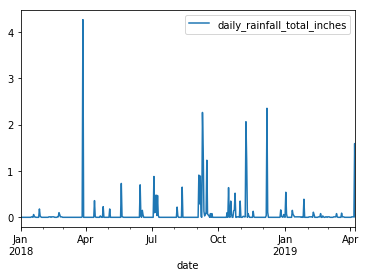

In [96]:
rain [rain.location_name == "Calaveras 10"].plot()

In [103]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13395 entries, 2018-01-01 to 2019-04-08
Data columns (total 2 columns):
location_name                  13395 non-null object
daily_rainfall_total_inches    13395 non-null float64
dtypes: float64(1), object(1)
memory usage: 313.9+ KB


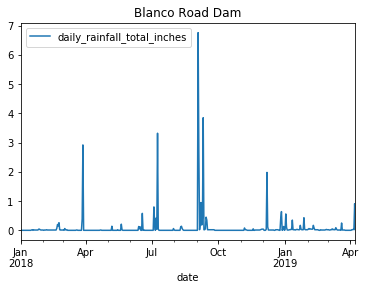

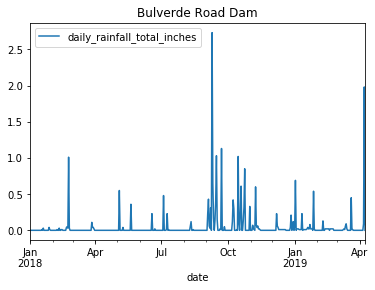

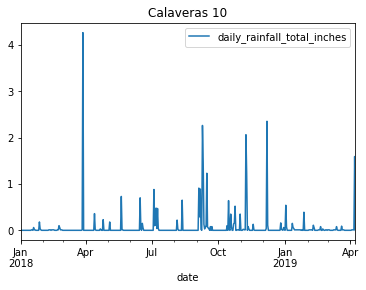

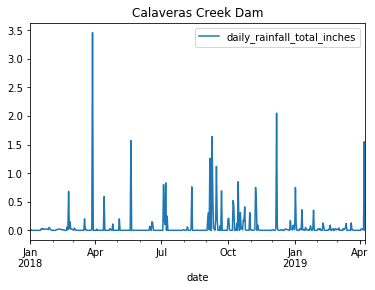

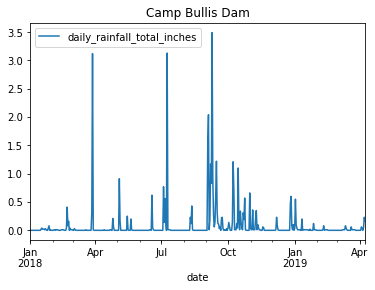

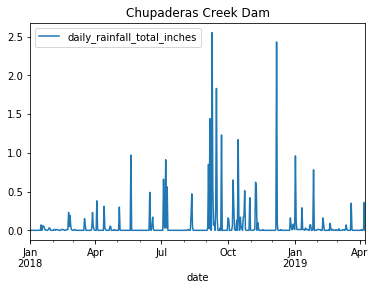

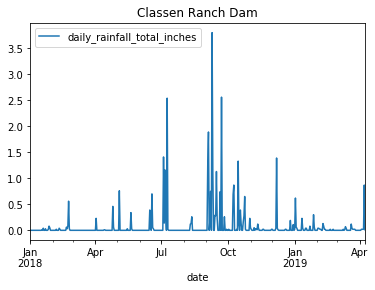

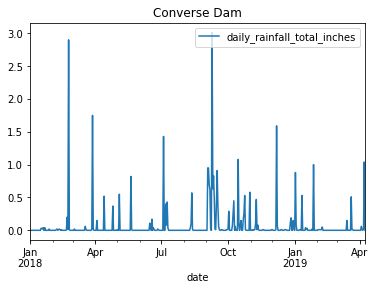

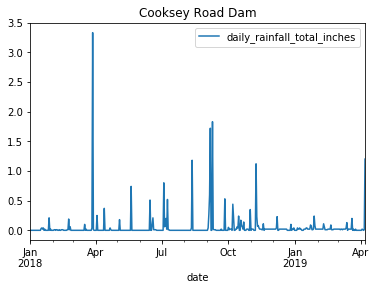

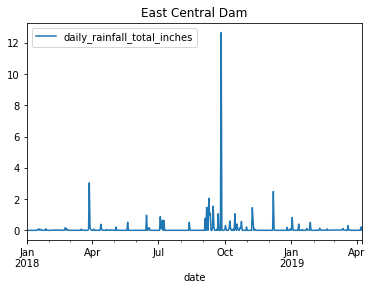

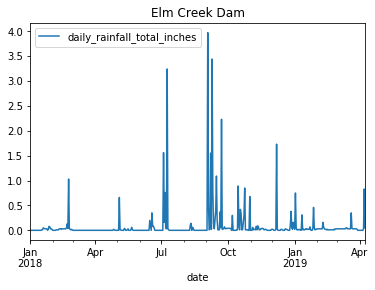

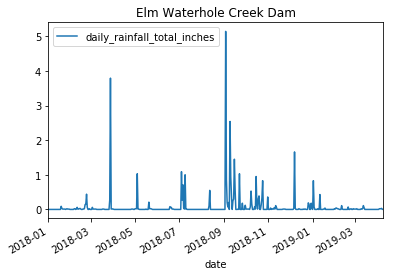

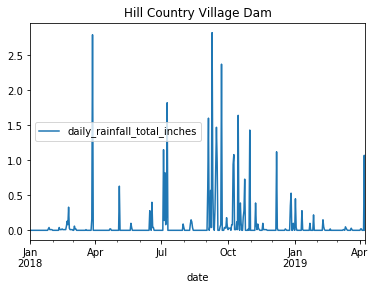

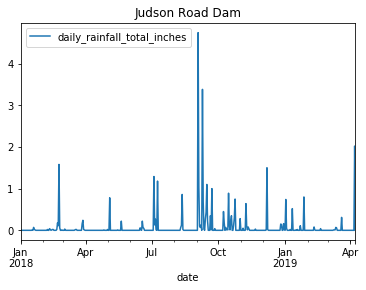

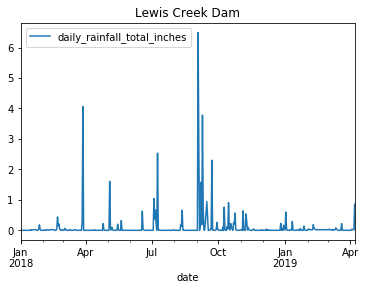

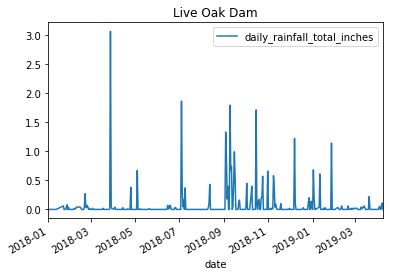

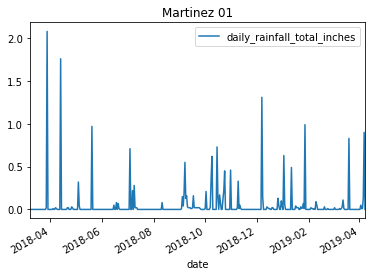

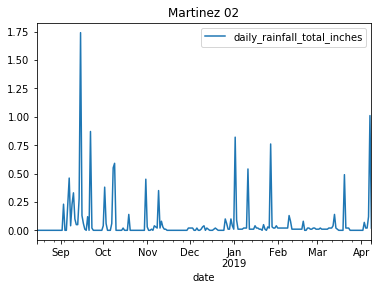

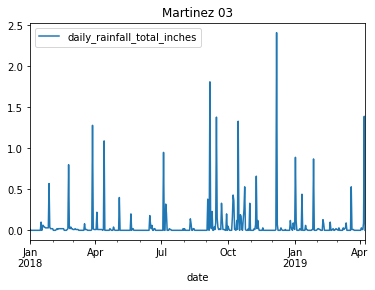

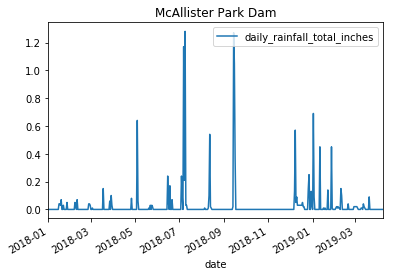

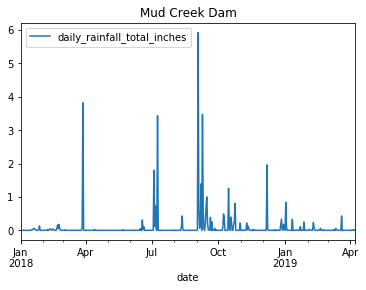

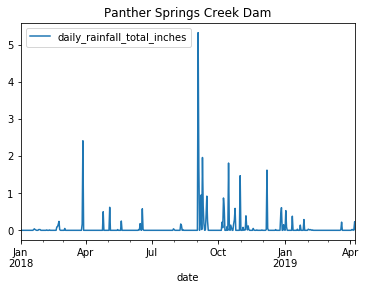

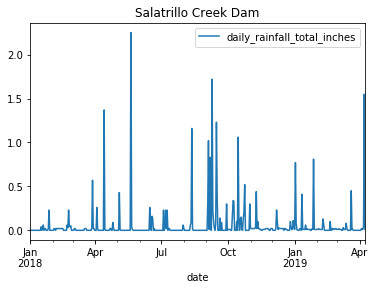

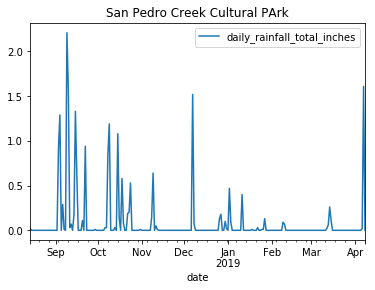

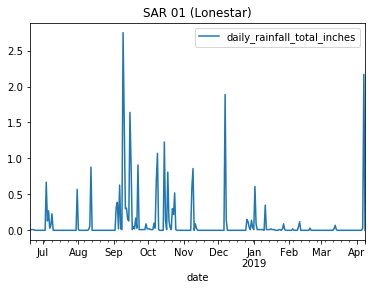

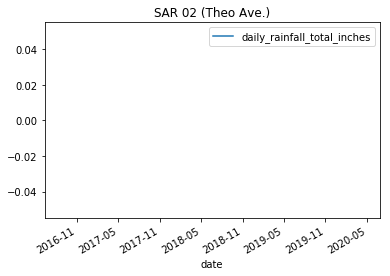

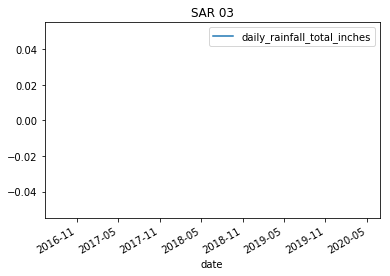

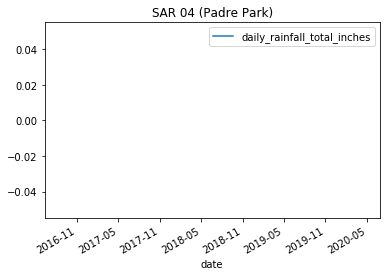

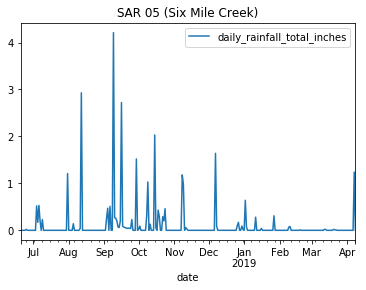

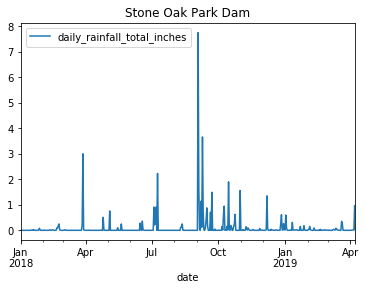

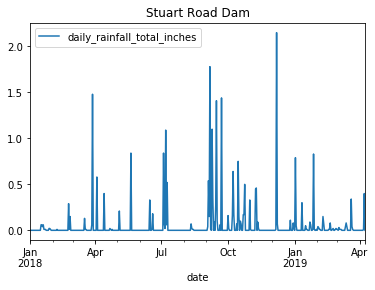

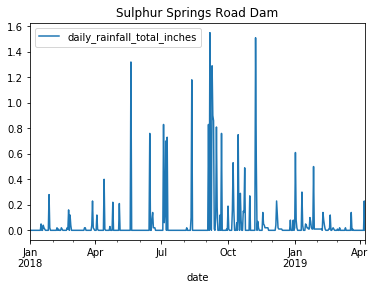

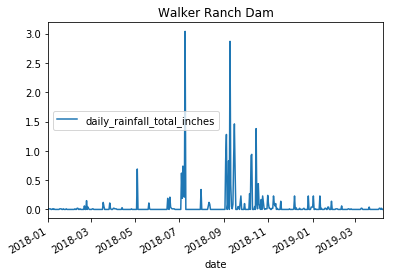

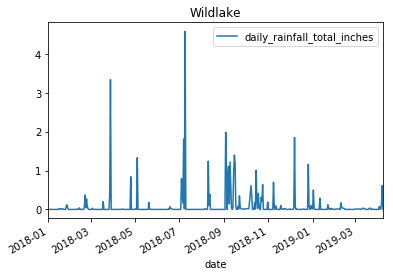

In [114]:
for loc in locs:
    rain [rain.location_name == loc].plot()
    plt.title(loc)
plt.show()